In [11]:
import os 
import pandas as pd 
import numpy as np 
from scipy.stats import ttest_ind

In [12]:
csv_file="/data/digbose92/MuSE_Loreal_study/mica-MUSE-LoREAL/RP_data_screentime_metrics_filtered_data.csv"
rp_data=pd.read_csv(csv_file)

In [3]:
rp_data.columns

Index(['Filename', 'Advertiser', 'Date', 'Version', 'Country', 'Duration',
       'Description', 'Brand/Product', 'ProductAdvertiser', 'Title',
       ...
       '[6.1, 7.1)', '[7.1, 8.1)', '[8.1, 9.1)', '[9.1, 10.1)', 'light',
       'medium', 'dark', 'light_screentime', 'medium_screentime',
       'dark_screentime'],
      dtype='object', length=173)

In [13]:
age_bins=['[0, 15)','[15, 25)','[25, 35)','[35, 45)', '[45, 55)','[55, 65)', '[65, 75)']
for age_bin in age_bins:
    
    age_col=[col for col in rp_data.columns if age_bin in col]
    print(age_col)
    subsample_df=rp_data[age_col]
    rp_data[age_bin]=subsample_df.sum(axis=1)

['(female, [0, 15), [-inf, 1.1))', '(female, [0, 15), [1.1, 2.1))', '(female, [0, 15), [2.1, 3.1))', '(female, [0, 15), [3.1, 4.1))', '(female, [0, 15), [4.1, 5.1))', '(female, [0, 15), [5.1, 6.1))', '(female, [0, 15), [6.1, 7.1))', '(female, [0, 15), [7.1, 8.1))', '(female, [0, 15), [8.1, 9.1))', '(male, [0, 15), [-inf, 1.1))', '(male, [0, 15), [1.1, 2.1))', '(male, [0, 15), [2.1, 3.1))', '(male, [0, 15), [3.1, 4.1))', '(male, [0, 15), [4.1, 5.1))', '(male, [0, 15), [5.1, 6.1))', '(male, [0, 15), [6.1, 7.1))', '(male, [0, 15), [7.1, 8.1))', '(male, [0, 15), [8.1, 9.1))']
['(female, [15, 25), [-inf, 1.1))', '(female, [15, 25), [1.1, 2.1))', '(female, [15, 25), [2.1, 3.1))', '(female, [15, 25), [3.1, 4.1))', '(female, [15, 25), [4.1, 5.1))', '(female, [15, 25), [5.1, 6.1))', '(female, [15, 25), [6.1, 7.1))', '(female, [15, 25), [7.1, 8.1))', '(female, [15, 25), [8.1, 9.1))', '(female, [15, 25), [9.1, 10.1))', '(male, [15, 25), [-inf, 1.1))', '(male, [15, 25), [1.1, 2.1))', '(male, [15, 

In [14]:
rp_data['[25, 35)']

0       169
1       376
2       205
3       359
4       291
       ... 
7643    890
7644    305
7645    140
7646    200
7647    326
Name: [25, 35), Length: 7648, dtype: int64

In [15]:
rp_data['[45, 75)']=rp_data['[45, 55)']+rp_data['[55, 65)']+rp_data['[65, 75)']

In [16]:
rp_data['[45, 75)']
age_condensed_bins=['[0, 15)','[15, 25)','[25, 35)','[35, 45)','[45, 75)']

In [17]:
!pip install tqdm
#COMPUTE COVERAGE FOR EVERY ENTRY IN CSV DATA
from tqdm import tqdm
subsample_age_data=rp_data[age_condensed_bins]


coverage_value_age=[]

for i in tqdm(np.arange(rp_data.shape[0])):
    age_faces=subsample_age_data.loc[i]
    age_list=list(age_faces)
    #count number of non zero entries
    non_zero_count = len([x for x in age_list if x != 0])
    coverage_age=non_zero_count/len(age_list)
    coverage_value_age.append(coverage_age)
    
rp_data['age_coverage']=coverage_value_age

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7648/7648 [00:00<00:00, 24695.83it/s]


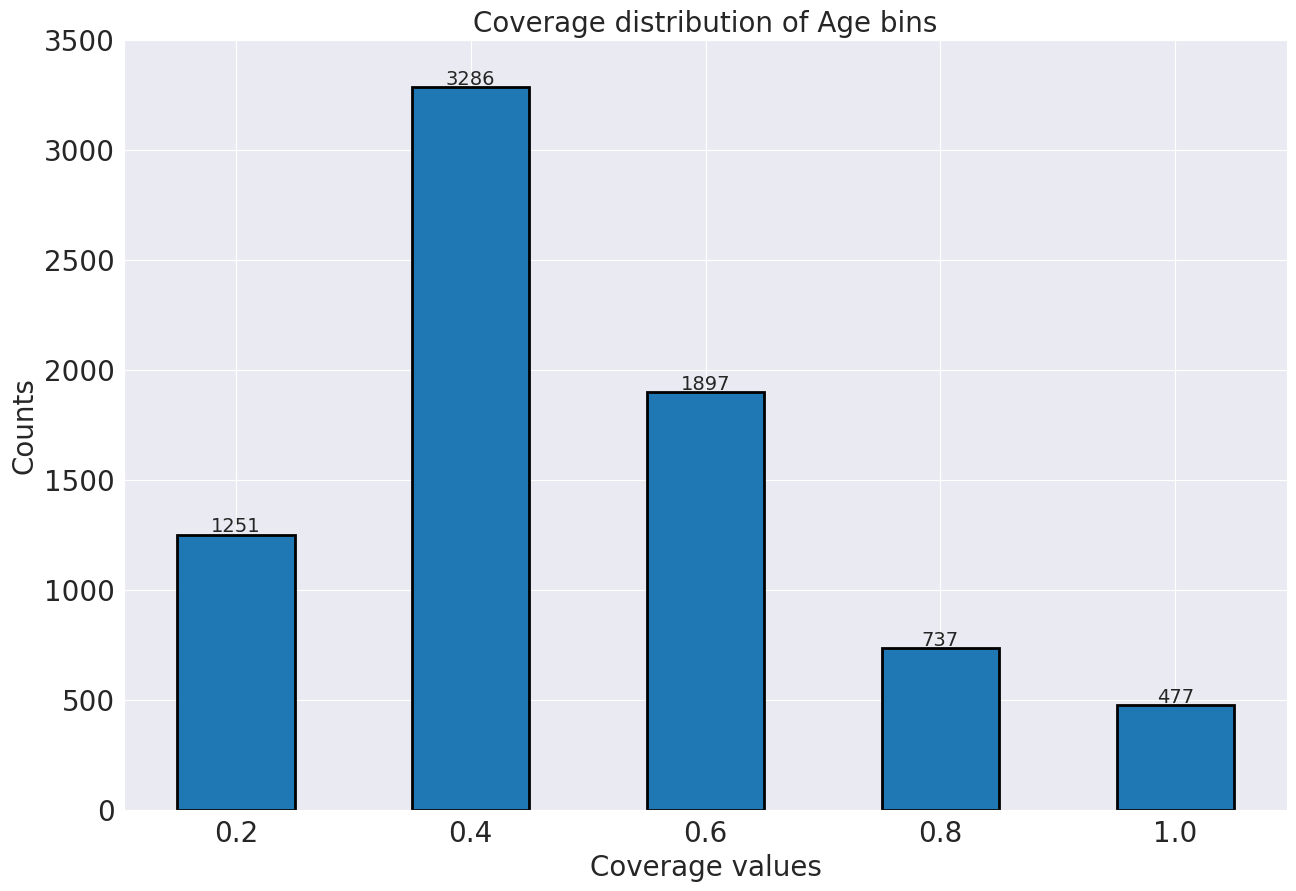

In [18]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = (15,10)

fig, ax = plt.subplots()
number_coverage=dict(Counter(coverage_value_age))
keys_list=[0.2,0.4,0.6,0.8,1.0]

#plot the dictionary in terms of bar plot 

coverage_list=[number_coverage[k] for k in keys_list]
ax.bar(keys_list,coverage_list,
           edgecolor='black', align='center',
           linewidth=2, width=0.1)

for i, v in enumerate(coverage_list):
    ax.text(keys_list[i], v+12, str(v), ha='center', fontsize=14)

# set the title and axis labels
ax.set_title('Coverage distribution of Age bins', fontsize=20)
ax.set_xlabel('Coverage values', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
filename="Age_based_coverage.png"
plt.savefig('plots/'+filename,dpi=300)

Canada
t-test between India and Mexico: t=3.284632822639577, p=0.00144040861990715
t-test between Mexico and Indonesia: t=1.1215955405062246, p=0.2656608344583311
t-test between Indonesia and Spain: t=2.235473859621765, p=0.026252246725266007
t-test between Spain and Brazil: t=0.31683116042826165, p=0.7516086586994274
t-test between Brazil and UK: t=0.7208578145417996, p=0.4710923560090896
t-test between UK and France: t=2.213856741491044, p=0.026927507034298852
t-test between France and Italy: t=1.4329284227251466, p=0.1520711182194333
t-test between Italy and Germany: t=0.011464331094170797, p=0.9908535584513487
t-test between Germany and USA: t=0.8323273693409222, p=0.4052751354086156
India > Mexico > Indonesia > Spain = Brazil = UK > France > Italy = Germany > 

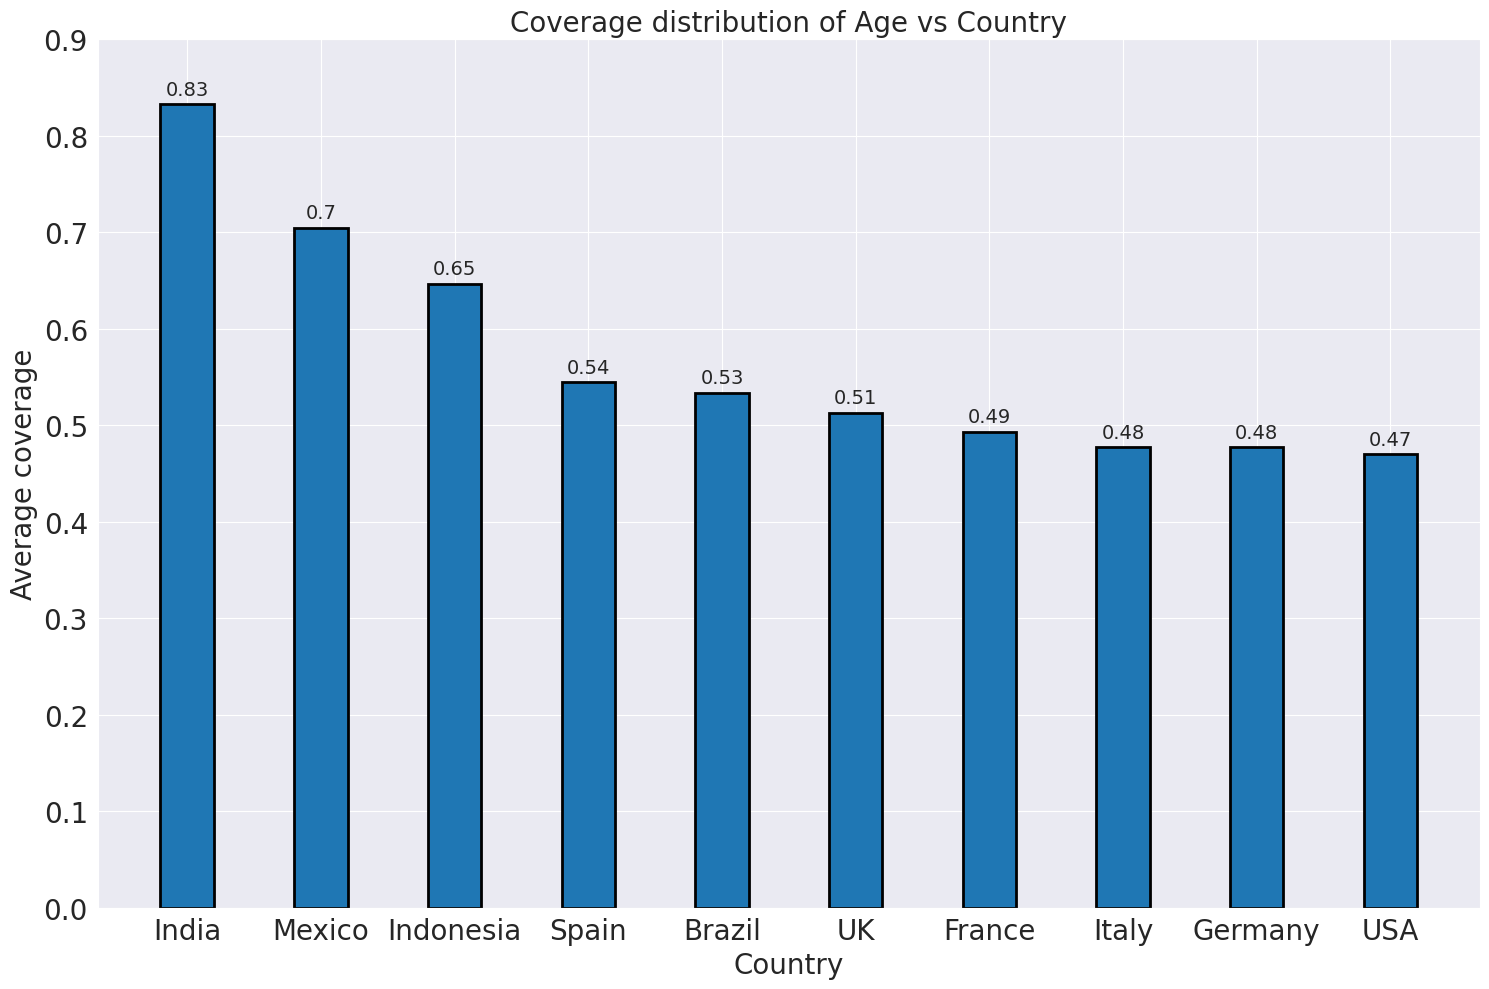

In [19]:
#country wise average age coverage 

country_list=list(rp_data['Country'].unique())
country_wise_age_coverage=[]
country_filter_list=[]

for country in country_list:
    
    rp_data_country=rp_data[rp_data['Country']==country]
    if(len(rp_data_country)>=30):
        age_coverage_country_mean=np.nanmean(list(rp_data_country['age_coverage']))
        country_wise_age_coverage.append(age_coverage_country_mean)
        country_filter_list.append(country)
    else:
        print(country)
        
#sort the bar plot by means 
pvalues_list=[]
confidence=0.05

age_coverage_ids=np.argsort(-np.array(country_wise_age_coverage))
sorted_age_coverage=[country_wise_age_coverage[i] for i in age_coverage_ids]
country_filter_list_sorted=[country_filter_list[i] for i in age_coverage_ids]

for i in range(len(country_filter_list_sorted)-1):
        
        c_i=rp_data[rp_data['Country']==country_filter_list_sorted[i]]
        c_j=rp_data[rp_data['Country']==country_filter_list_sorted[i+1]]
        
        t, p = ttest_ind(list(c_i['age_coverage']), list(c_j['age_coverage']))
        pvalues_list.append(p)
        print(f"t-test between {country_filter_list_sorted[i]} and {country_filter_list_sorted[i+1]}: t={t}, p={p}")

significant = np.array(pvalues_list)/(len(country_filter_list_sorted) - 1) < confidence

for j in range(len(country_filter_list_sorted)-1):
    cat = country_filter_list_sorted[j]
    sign = ">" if significant[j] else "="
    print(f"{cat} {sign} ", end="")

fig, ax = plt.subplots()    
#plot the dictionary in terms of bar plot 
ax.bar(country_filter_list_sorted,sorted_age_coverage,
           edgecolor='black', align='center',
           linewidth=2, width=0.4)

for i, v in enumerate(sorted_age_coverage):
    ax.text(country_filter_list_sorted[i], v+0.01, str(round(v,2)), ha='center', fontsize=14)

# set the title and axis labels
ax.set_title('Coverage distribution of Age vs Country', fontsize=20)
ax.set_xlabel('Country', fontsize=20)
ax.set_ylabel('Average coverage', fontsize=20)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
plt.tight_layout()
filename="Country_based_average_age_coverage.png"
plt.savefig('plots/'+filename,dpi=300)

In [20]:
skintone_condensed_bins=['light','medium','dark']
subsample_skintone_data=rp_data[skintone_condensed_bins]

In [21]:
coverage_value_skintone=[]

for i in tqdm(np.arange(rp_data.shape[0])):
    sk_faces=subsample_skintone_data.loc[i]
    sk_list=list(sk_faces)
    #count number of non zero entries
    non_zero_count = len([x for x in sk_list if x != 0])
    coverage_sk=round(non_zero_count/len(sk_list),2)
    coverage_value_skintone.append(coverage_sk)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7648/7648 [00:00<00:00, 13122.62it/s]


{0.33: 3916, 0.67: 2497, 1.0: 1235}
['0.33', '0.67', '1.0']


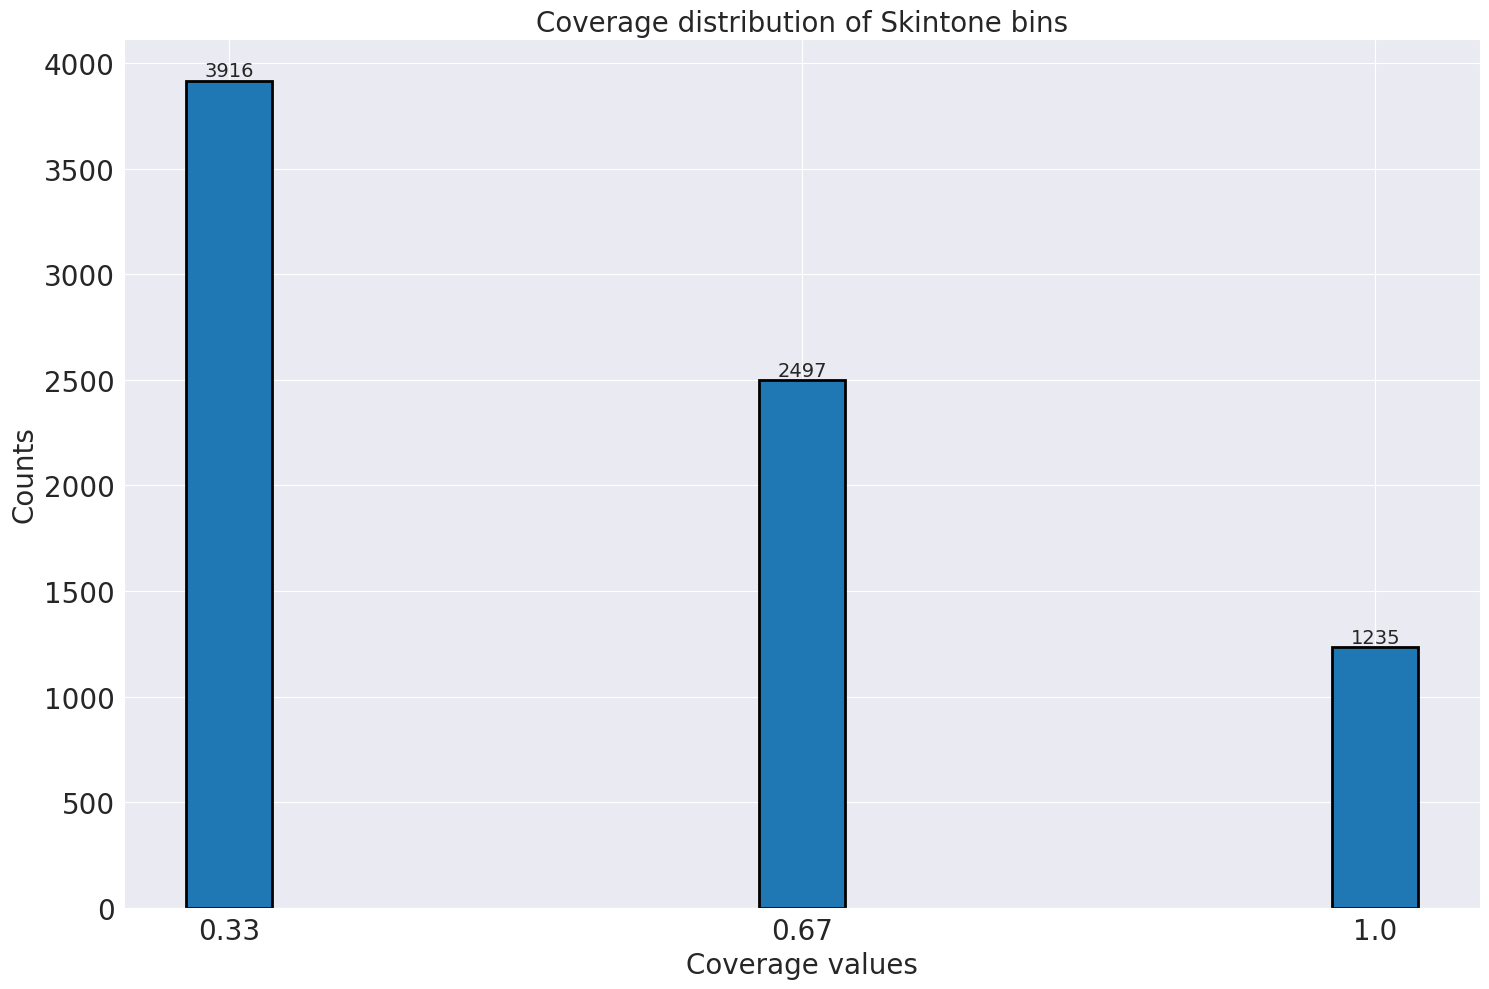

In [35]:
rp_data['skintone_coverage']=coverage_value_skintone 

fig, ax = plt.subplots()
number_sk_coverage=dict(Counter(coverage_value_skintone))
#rename the keys 
print(number_sk_coverage)

keys_list=[0.33,0.67,1.0]

sk_coverage_list=[number_sk_coverage[k] for k in keys_list]
keys_str_list=[str(k) for k in keys_list]
print(keys_str_list)
 
ax.bar(range(len(keys_list)),sk_coverage_list,
           edgecolor='black', align='center',
           linewidth=2, width=0.15)

for i, v in enumerate(sk_coverage_list):
    ax.text(i, v+20, str(v), ha='center', fontsize=14)

# set the title and axis labels
ax.set_title('Coverage distribution of Skintone bins', fontsize=20)
ax.set_xlabel('Coverage values', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)

# get the x-tick labels
plt.xticks(range(len(keys_list)), keys_str_list)
yticks = ax.get_yticks()
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

plt.tight_layout()
filename="Skintone_based_coverage.png"
plt.savefig('plots/'+filename,dpi=300)

Canada
Indonesia
t-test between Brazil and UK: t=0.6127920847006144, p=0.5400926817248028
t-test between UK and USA: t=0.4071359788974423, p=0.6839442165234115
t-test between USA and France: t=2.7866619316469383, p=0.0053917847352547
t-test between France and Italy: t=0.5274987692975748, p=0.5979194598730952
t-test between Italy and Spain: t=0.05234211291179285, p=0.9582662374569365
t-test between Spain and Germany: t=3.744279481480676, p=0.0001838842921587814
t-test between Germany and India: t=0.0593370848579168, p=0.9526872729268752
t-test between India and Mexico: t=0.8770686602778593, p=0.38270938814364375
Brazil = UK = USA > France = Italy = Spain > Germany = India > 

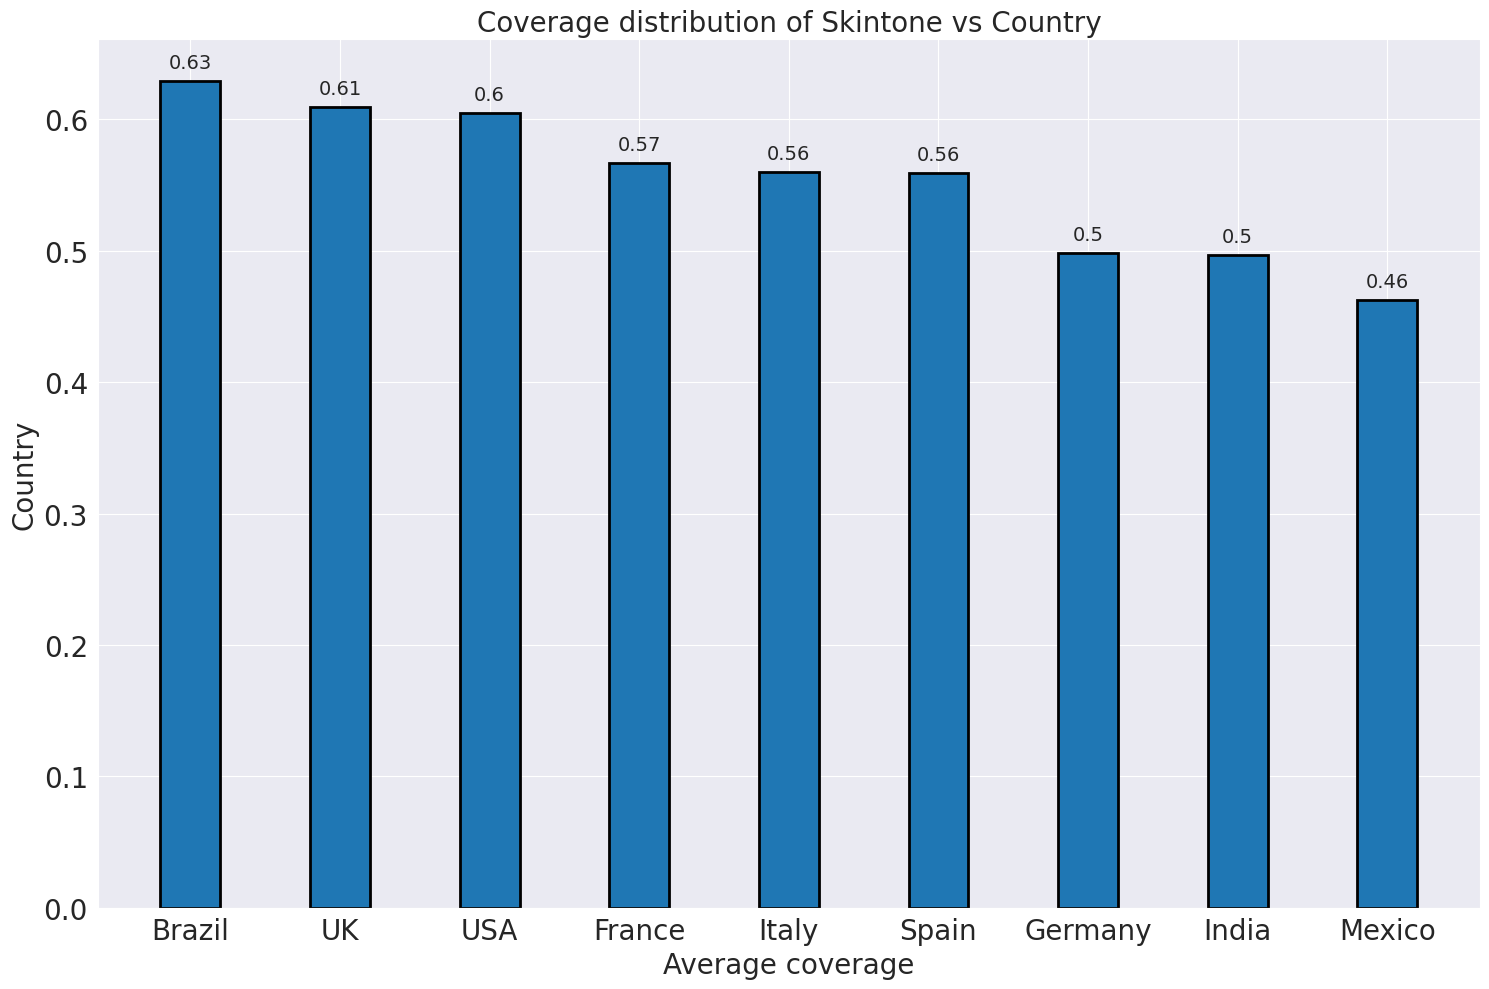

In [25]:
country_wise_skintone_coverage=[]
country_filter_list=[]
for country in country_list:
    
    rp_data_country=rp_data[rp_data['Country']==country]
    
    if(len(rp_data_country)>30):
        sk_coverage_country=np.nanmean(list(rp_data_country['skintone_coverage']))
        country_wise_skintone_coverage.append(sk_coverage_country)
        country_filter_list.append(country)
    else:
        print(country)

fig, ax = plt.subplots()   

#sort the bar plot by means 
pvalues_list=[]
confidence=0.05

skintone_coverage_ids=np.argsort(-np.array(country_wise_skintone_coverage))
sorted_skintone_coverage=[country_wise_skintone_coverage[i] for i in skintone_coverage_ids]
country_filter_list_sorted=[country_filter_list[i] for i in skintone_coverage_ids]

for i in range(len(country_filter_list_sorted)-1):
        
        c_i=rp_data[rp_data['Country']==country_filter_list_sorted[i]]
        c_j=rp_data[rp_data['Country']==country_filter_list_sorted[i+1]]
        
        t, p = ttest_ind(list(c_i['skintone_coverage']), list(c_j['skintone_coverage']))
        pvalues_list.append(p)
        print(f"t-test between {country_filter_list_sorted[i]} and {country_filter_list_sorted[i+1]}: t={t}, p={p}")

significant = np.array(pvalues_list)/(len(country_filter_list_sorted) - 1) < confidence

for j in range(len(country_filter_list_sorted)-1):
    cat = country_filter_list_sorted[j]
    sign = ">" if significant[j] else "="
    print(f"{cat} {sign} ", end="")

ax.bar(country_filter_list_sorted,sorted_skintone_coverage,
           edgecolor='black', align='center',
           linewidth=2, width=0.4)

for i, v in enumerate(sorted_skintone_coverage):
    ax.text(country_filter_list_sorted[i], v+0.01, str(round(v,2)), ha='center', fontsize=14)

# set the title and axis labels
ax.set_title('Coverage distribution of Skintone vs Country', fontsize=20)
ax.set_ylabel('Country', fontsize=20)
ax.set_xlabel('Average coverage', fontsize=20)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

plt.tight_layout()
filename="Country_based_average_skintone_coverage.png"
plt.savefig('plots/'+filename,dpi=300)

In [26]:
rp_data.columns

Index(['Filename', 'Advertiser', 'Date', 'Version', 'Country', 'Duration',
       'Description', 'Brand/Product', 'ProductAdvertiser', 'Title',
       ...
       '[0, 15)', '[15, 25)', '[25, 35)', '[35, 45)', '[45, 55)', '[55, 65)',
       '[65, 75)', '[45, 75)', 'age_coverage', 'skintone_coverage'],
      dtype='object', length=183)

In [27]:
len(rp_data['ProductAdvertiser'].unique())

17

t-test between KERASTASE and OAP: t=-8.994665646156344, p=8.905530578368363e-19
t-test between OAP and MNY: t=7.392611652124488, p=2.585108823775113e-13
t-test between MNY and KIEHLS: t=-5.142734646167438, p=3.375555957684255e-07
t-test between KIEHLS and GARNIER: t=2.8295283913484033, p=0.004702968390701104
t-test between GARNIER and LOP: t=1.0686021015571976, p=0.28538242839659783
t-test between LOP and YSL: t=-3.8836446041149175, p=0.00011235955017889407
t-test between YSL and BIOTHERM: t=6.064876510880156, p=2.1737947881710166e-09
t-test between BIOTHERM and MAYBELLINE: t=-5.557020650890239, p=4.857587065244545e-08
t-test between MAYBELLINE and ARMANI: t=0.690484165029329, p=0.4901250258190498
t-test between ARMANI and NYX: t=-3.2837567351661128, p=0.0010818784242638403
t-test between NYX and VICHY: t=14.497723098037856, p=1.962143060492919e-42
t-test between VICHY and LANCOME: t=-5.9874557255623895, p=2.956168478195772e-09
t-test between LANCOME and CERAVE: t=5.058698988394206, p=

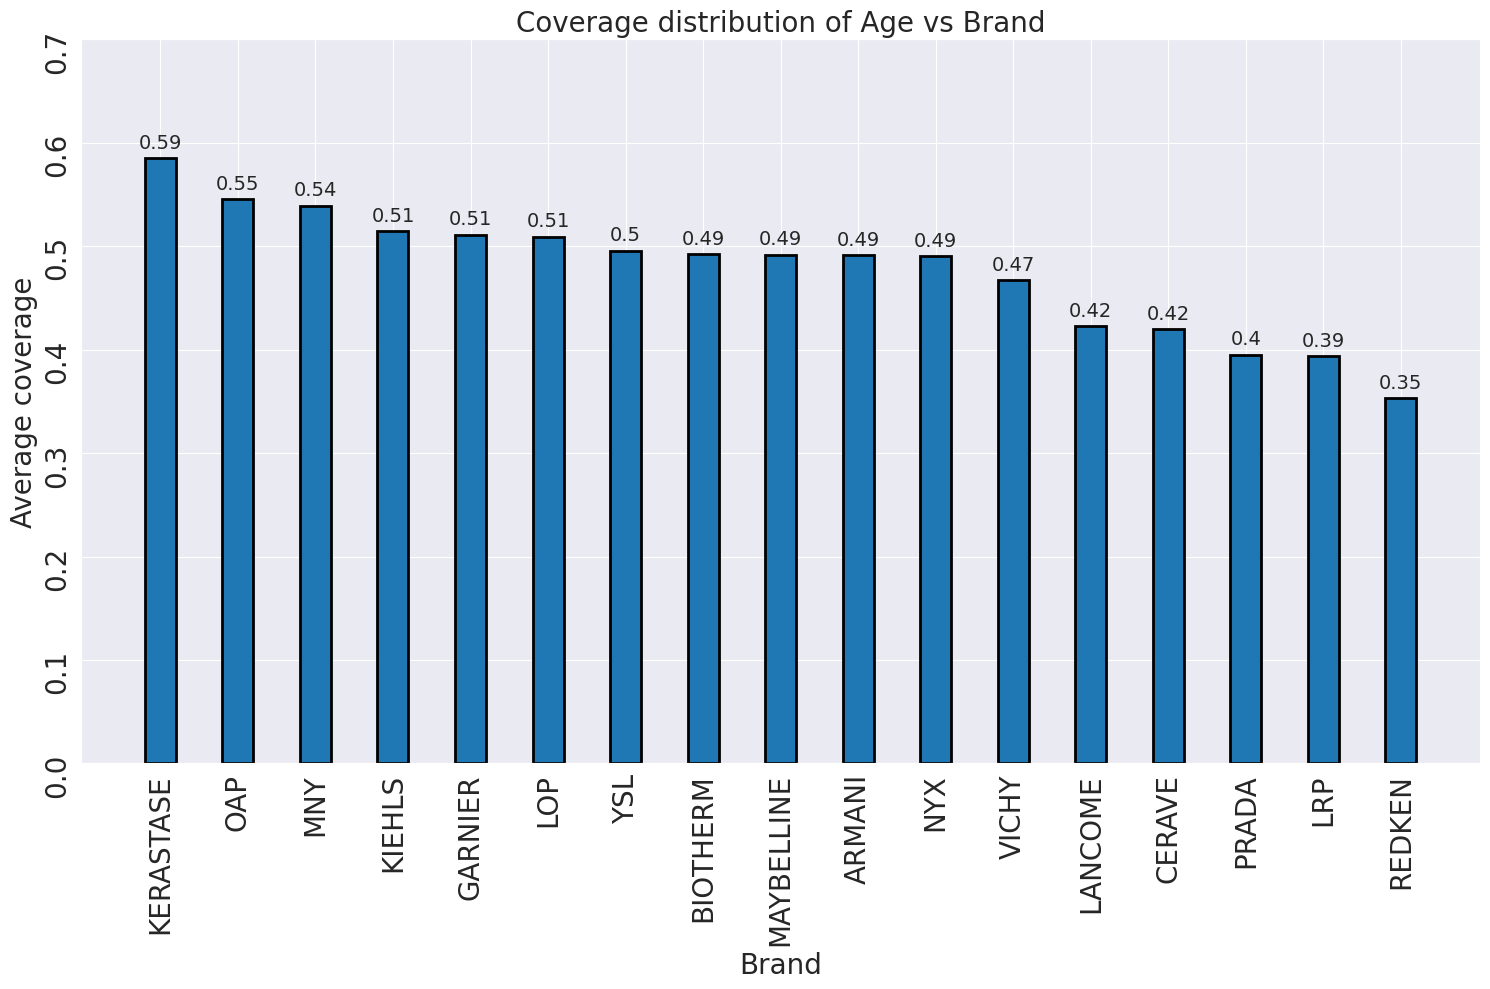

In [28]:
#compute age coverage average versus product advertiser

brand_wise_age_coverage=[]
brand_filter_list=[]

for brand in list(rp_data['ProductAdvertiser'].unique()):
    
    rp_data_brand=rp_data[rp_data['ProductAdvertiser']==brand]
    if(len(rp_data_brand)>=30):
        age_coverage_brand_mean=np.nanmean(list(rp_data_brand['age_coverage']))
        brand_wise_age_coverage.append(age_coverage_brand_mean)
        brand_filter_list.append(brand)
    else:
        print(rp_data_brand.shape)
        
        
#sort the bar plot by means 
pvalues_list=[]
confidence=0.05

age_coverage_ids_brand=np.argsort(-np.array(brand_wise_age_coverage))
sorted_age_coverage_brand=[brand_wise_age_coverage[i] for i in age_coverage_ids_brand]
brand_filter_list_sorted=[brand_filter_list[i] for i in age_coverage_ids_brand]

for i in range(len(brand_filter_list_sorted)-1):
        
        c_i=rp_data[rp_data['ProductAdvertiser']==brand_filter_list_sorted[i]]
        c_j=rp_data[rp_data['ProductAdvertiser']==brand_filter_list_sorted[i+1]]
        
        t, p = ttest_ind(list(c_i['skintone_coverage']), list(c_j['skintone_coverage']))
        pvalues_list.append(p)
        print(f"t-test between {brand_filter_list_sorted[i]} and {brand_filter_list_sorted[i+1]}: t={t}, p={p}")

significant = np.array(pvalues_list)/(len(brand_filter_list_sorted) - 1) < confidence
print(brand_filter_list_sorted)
for j in range(len(brand_filter_list_sorted)-1):
    cat = brand_filter_list_sorted[j]
    sign = ">" if significant[j] else "="
    print(f"{cat} {sign} ", end="")
    
fig, ax = plt.subplots()    
#plot the dictionary in terms of bar plot 
ax.bar(brand_filter_list_sorted,sorted_age_coverage_brand,
           edgecolor='black', align='center',
           linewidth=2, width=0.4)

for i, v in enumerate(sorted_age_coverage_brand):
    ax.text(brand_filter_list_sorted[i], v+0.01, str(round(v,2)), ha='center', fontsize=14)

# set the title and axis labels
ax.set_title('Coverage distribution of Age vs Brand', fontsize=20)
ax.set_xlabel('Brand', fontsize=20)
ax.set_ylabel('Average coverage', fontsize=20)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=20, rotation=90)
ax.tick_params(axis='x', labelsize=20, rotation=90)
plt.tight_layout()
filename="Brand_based_average_age_coverage.png"
plt.savefig('plots/'+filename,dpi=300)

In [29]:
brand_wise_age_coverage

[0.49139465875370925,
 0.5112328767123288,
 0.4226190476190477,
 0.39366085578446913,
 0.5392156862745098,
 0.5454545454545454,
 0.46731898238747555,
 0.4955954323001632,
 0.4200836820083683,
 0.5850746268656717,
 0.509090909090909,
 0.5146853146853148,
 0.4919075144508671,
 0.49020979020979016,
 0.39523809523809544,
 0.35333333333333333,
 0.4925]

In [30]:
brand_filter_list

['ARMANI',
 'GARNIER',
 'LANCOME',
 'LRP',
 'MNY',
 'OAP',
 'VICHY',
 'YSL',
 'CERAVE',
 'KERASTASE',
 'LOP',
 'KIEHLS',
 'MAYBELLINE',
 'NYX',
 'PRADA',
 'REDKEN',
 'BIOTHERM']

0.33 1.0
Counter({0.33: 144, 0.67: 122, 1.0: 71}) 0.5942433234421365
0.33 1.0
Counter({0.33: 910, 0.67: 645, 1.0: 270}) 0.5492876712328767
0.33 1.0
Counter({0.33: 309, 0.67: 115, 1.0: 80}) 0.5139285714285714
0.33 1.0
Counter({0.33: 370, 0.67: 179, 1.0: 82}) 0.5135182250396196
0.33 1.0
Counter({0.33: 238, 0.67: 135, 1.0: 35}) 0.49997549019607845
0.33 1.0
Counter({0.67: 384, 0.33: 330, 1.0: 166}) 0.6047500000000001
0.33 1.0
Counter({0.33: 367, 0.67: 133, 1.0: 11}) 0.4329158512720157
0.33 1.0
Counter({0.33: 241, 0.67: 196, 1.0: 176}) 0.6310766721044047
0.33 1.0
Counter({0.33: 191, 0.67: 32, 1.0: 16}) 0.4203765690376569
0.33 1.0
Counter({0.33: 225, 0.67: 83, 1.0: 27}) 0.4682388059701493
0.33 1.0
Counter({0.33: 56, 0.67: 45, 1.0: 9}) 0.5239090909090909
0.33 1.0
Counter({0.33: 198, 0.67: 135, 1.0: 96}) 0.586923076923077
0.33 1.0
Counter({0.33: 137, 0.67: 133, 1.0: 76}) 0.6078612716763006
0.33 1.0
Counter({0.33: 101, 1.0: 100, 0.67: 85}) 0.6653146853146853
0.33 1.0
Counter({0.67: 44, 0.33: 22

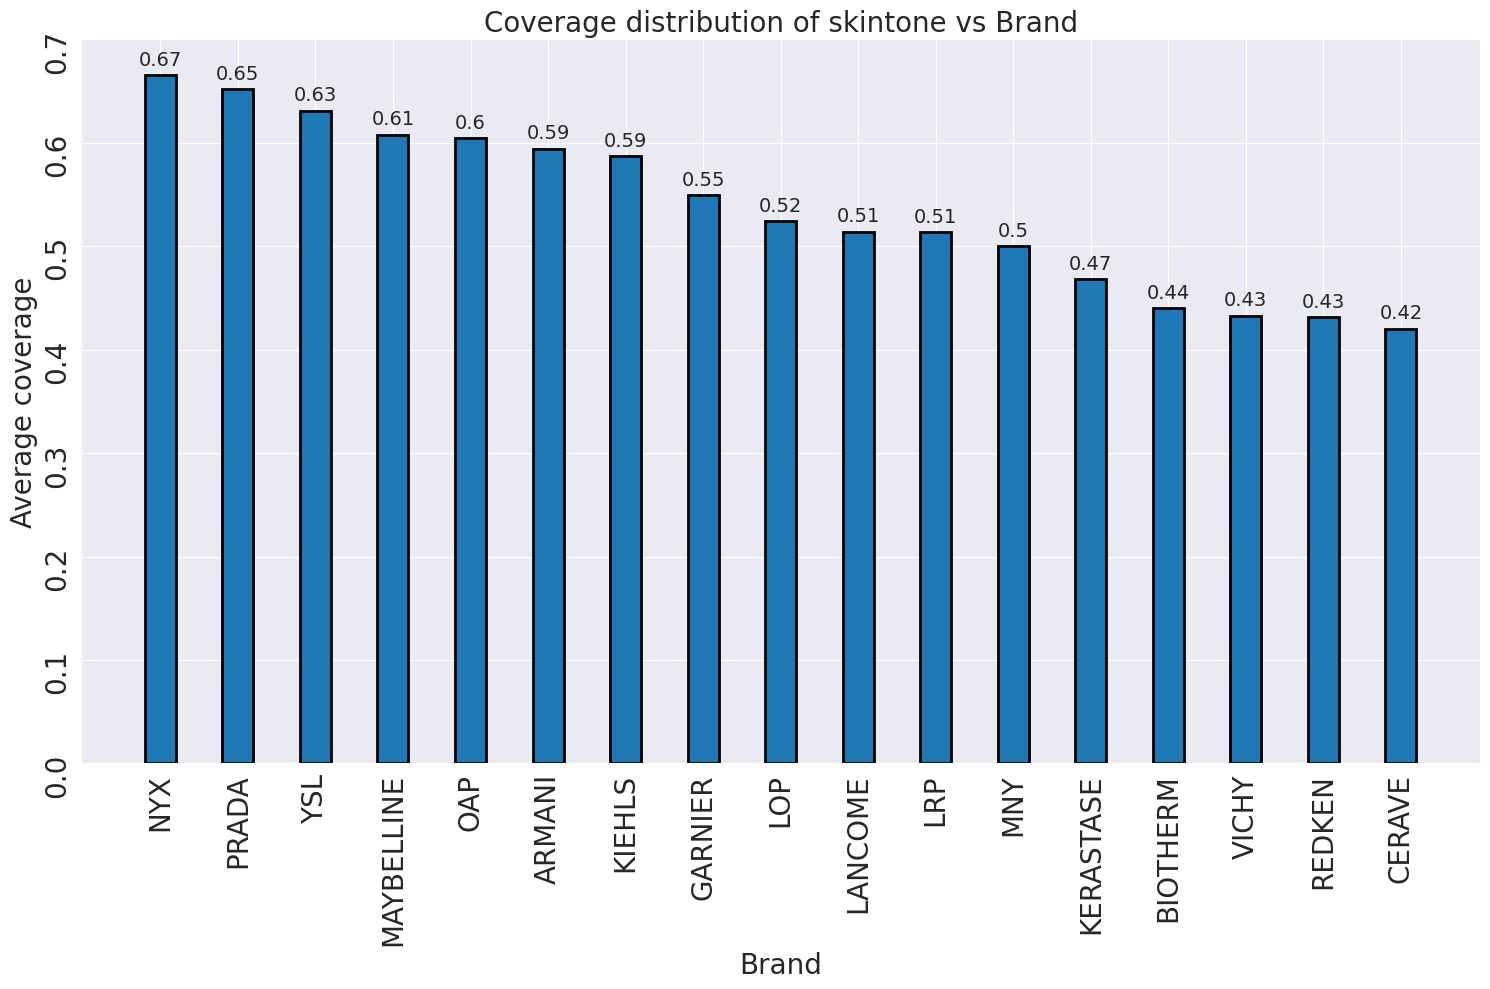

In [39]:
brand_wise_skintone_coverage=[]
brand_filter_list=[]

for brand in list(rp_data['ProductAdvertiser'].unique()):
    
    rp_data_brand=rp_data[rp_data['ProductAdvertiser']==brand]
    print(rp_data_brand['skintone_coverage'].min(),rp_data_brand['skintone_coverage'].max())
    print(Counter(list(rp_data_brand['skintone_coverage'])),rp_data_brand['skintone_coverage'].mean())
    if(len(rp_data_brand)>=30):
        skintone_coverage_brand_mean=np.nanmean(list(rp_data_brand['skintone_coverage']))
        brand_wise_skintone_coverage.append(skintone_coverage_brand_mean)
        brand_filter_list.append(brand)
    else:
        print(rp_data_brand.shape)
        
        
#sort the bar plot by means 
pvalues_list=[]
confidence=0.05

sorted_skintone_coverage_ids_brand=np.argsort(-np.array(brand_wise_skintone_coverage))
sorted_skintone_coverage_brand=[brand_wise_skintone_coverage[i] for i in skintone_coverage_ids_brand]
brand_filter_list_sorted=[brand_filter_list[i] for i in sorted_skintone_coverage_ids_brand]

for i in range(len(brand_filter_list_sorted)-1):
        
        c_i=rp_data[rp_data['ProductAdvertiser']==brand_filter_list_sorted[i]]
        c_j=rp_data[rp_data['ProductAdvertiser']==brand_filter_list_sorted[i+1]]
        
        t, p = ttest_ind(list(c_i['skintone_coverage']), list(c_j['skintone_coverage']))
        pvalues_list.append(p)
        print(f"t-test between {brand_filter_list_sorted[i]} and {brand_filter_list_sorted[i+1]}: t={t}, p={p}")

significant = np.array(pvalues_list)/(len(brand_filter_list_sorted) - 1) < confidence
print(brand_filter_list_sorted)
for j in range(len(brand_filter_list_sorted)-1):
    cat = brand_filter_list_sorted[j]
    sign = ">" if significant[j] else "="
    print(f"{cat} {sign} ", end="")
    
fig, ax = plt.subplots()    
#plot the dictionary in terms of bar plot 
ax.bar(brand_filter_list_sorted,sorted_skintone_coverage_brand,
           edgecolor='black', align='center',
           linewidth=2, width=0.4)

for i, v in enumerate(sorted_skintone_coverage_brand):
    ax.text(brand_filter_list_sorted[i], v+0.01, str(round(v,2)), ha='center', fontsize=14)

# set the title and axis labels
ax.set_title('Coverage distribution of skintone vs Brand', fontsize=20)
ax.set_xlabel('Brand', fontsize=20)
ax.set_ylabel('Average coverage', fontsize=20)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=20, rotation=90)
ax.tick_params(axis='x', labelsize=20, rotation=90)
plt.tight_layout()
filename="Brand_based_average_skintone_coverage.png"
plt.savefig('plots/'+filename,dpi=300)

In [40]:
#box plot of coverage across brands 
brand_filter_list=[]
brand_skintone_list=[]

for brand in list(rp_data['ProductAdvertiser'].unique()):
    
    rp_data_brand=rp_data[rp_data['ProductAdvertiser']==brand]
    brand_skintone=rp_data_brand['skintone_coverage']
    
    brand_filter_list.append(brand)
    brand_skintone_list.append(brand_skintone)

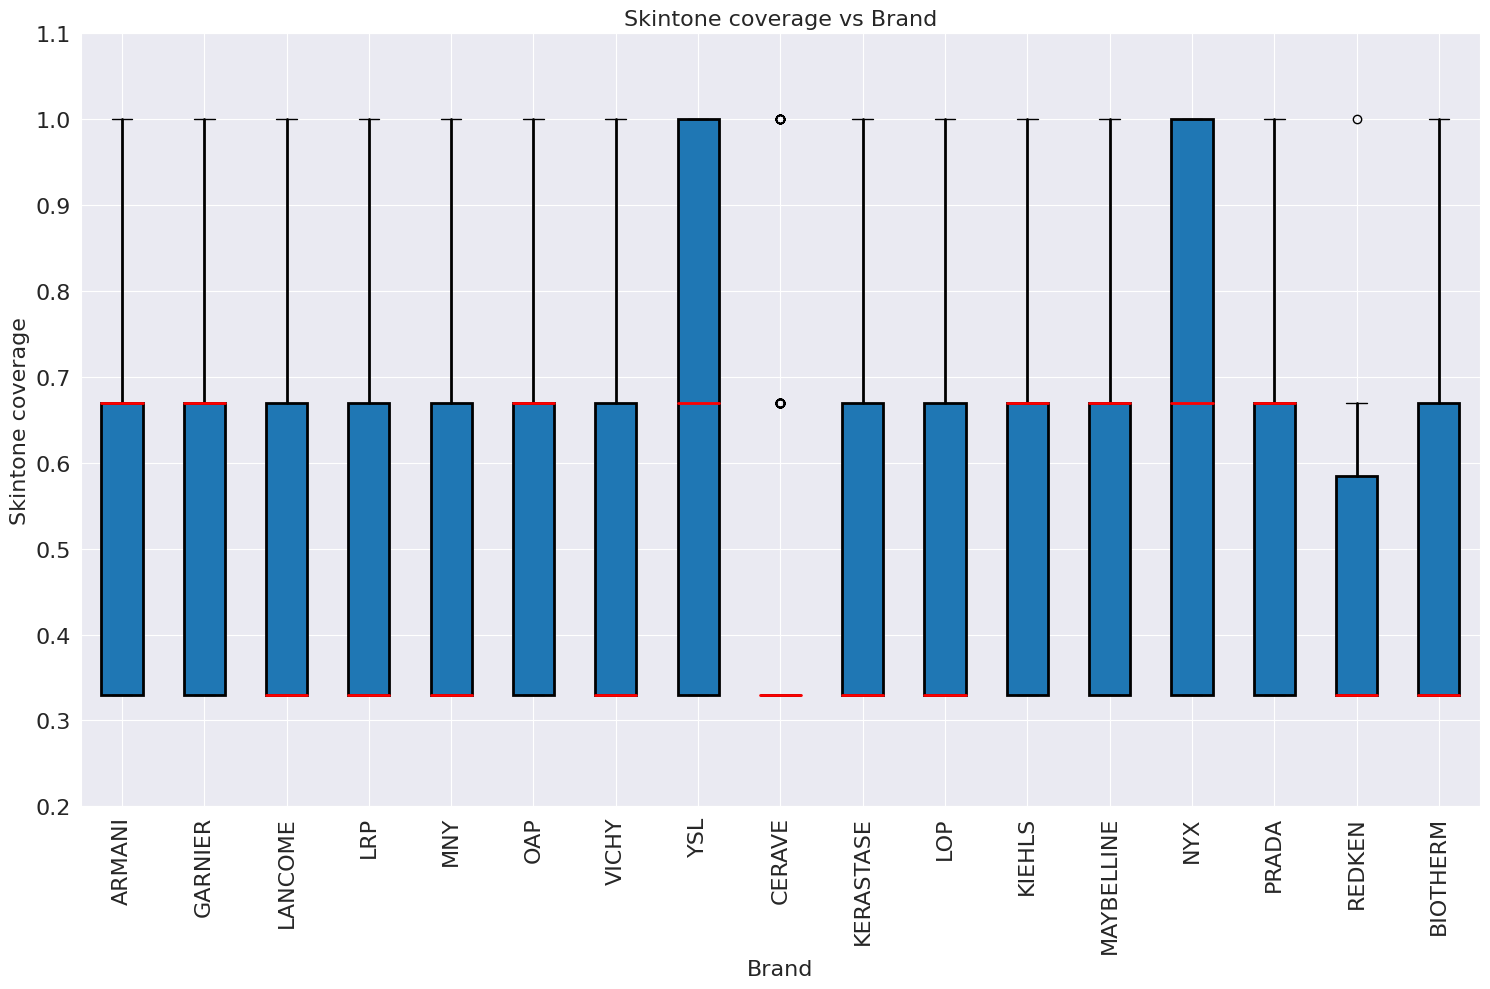

In [43]:
fig, ax = plt.subplots()

ax.boxplot(brand_skintone_list, labels=brand_filter_list, 
          patch_artist=True, 
          boxprops={'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Skintone coverage vs Brand',fontsize=16)
ax.set_xlabel('Brand',fontsize=16)
ax.set_ylabel('Skintone coverage', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('plots/box_plot_skintone_coverage_brand.png',dpi=300)

In [48]:
#box plot of coverage across countries
country_filter_list=[]
country_skintone_list=[]

for country in list(rp_data['Country'].unique()):
    
    rp_data_country=rp_data[rp_data['Country']==country]
    country_skintone=rp_data_country['skintone_coverage']
    
    country_filter_list.append(country)
    country_skintone_list.append(country_skintone)

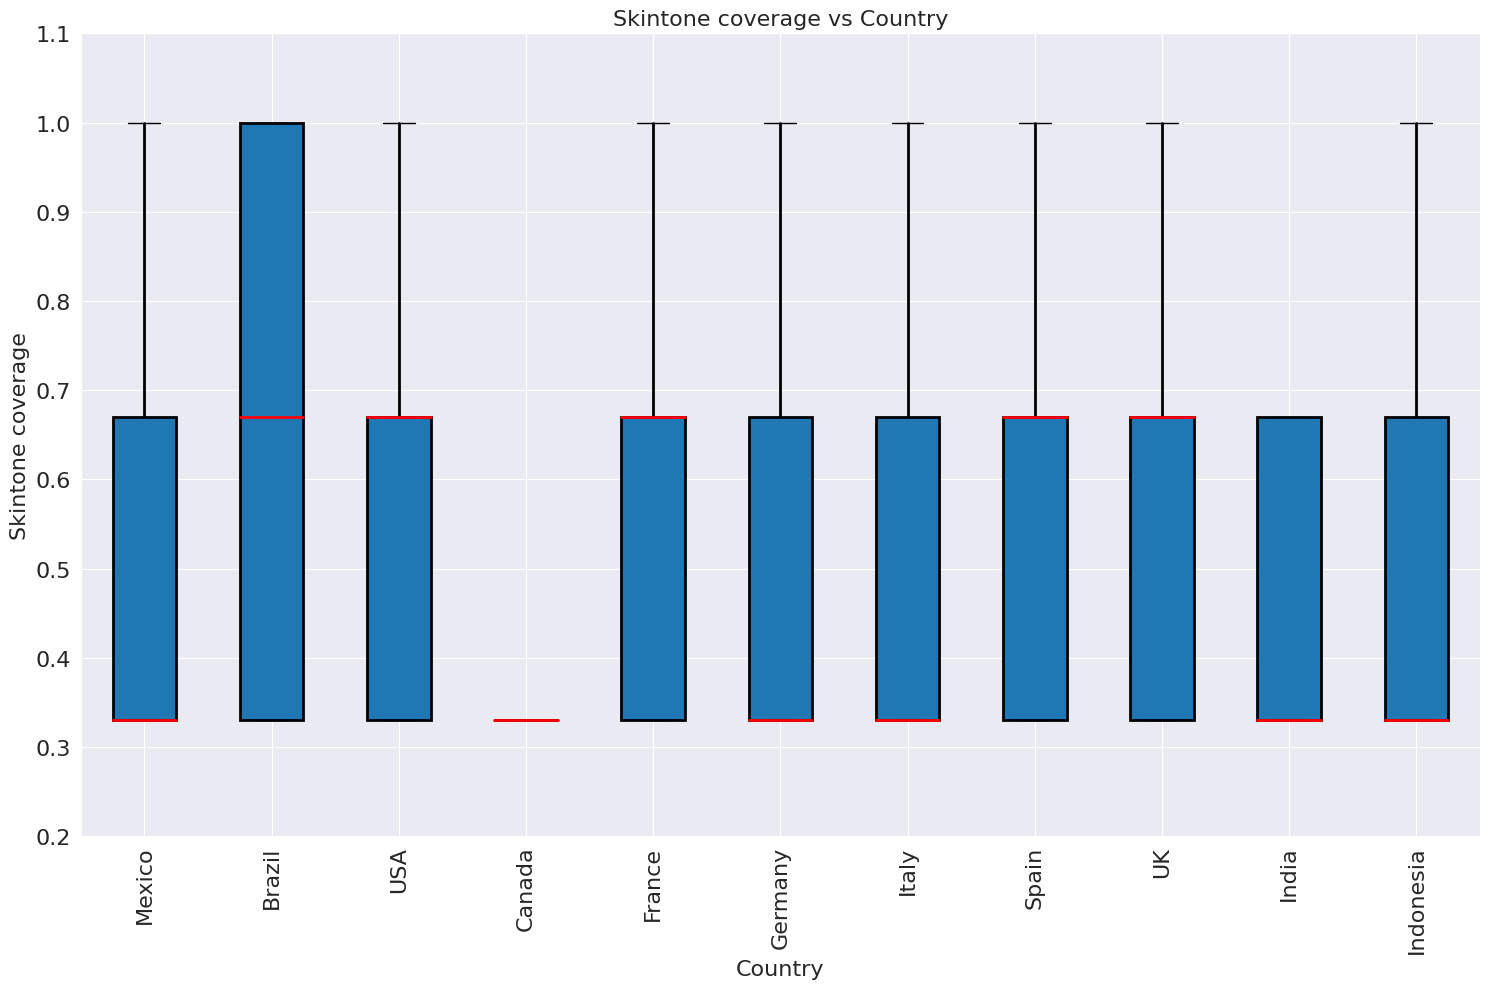

In [53]:
fig, ax = plt.subplots()

ax.boxplot(country_skintone_list, labels=country_filter_list, 
          patch_artist=True, 
          boxprops={'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Skintone coverage vs Country',fontsize=16)
ax.set_xlabel('Country',fontsize=16)
ax.set_ylabel('Skintone coverage', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('plots/box_plot_skintone_coverage_country.png',dpi=300)

In [49]:
country_skintone_list

[0     0.33
 1     0.67
 2     0.33
 3     0.33
 4     0.67
 5     0.33
 6     0.67
 7     0.67
 8     0.33
 9     0.33
 10    1.00
 11    1.00
 12    0.67
 13    0.33
 14    0.33
 15    0.67
 16    0.33
 17    0.67
 18    0.33
 19    0.33
 20    0.67
 21    0.33
 22    0.33
 23    0.33
 24    0.33
 25    0.67
 26    1.00
 27    0.33
 28    0.33
 29    0.33
 30    0.33
 31    0.33
 32    0.33
 33    0.33
 34    0.33
 35    0.33
 36    0.33
 37    0.33
 38    0.33
 39    0.67
 40    0.33
 41    0.33
 42    0.33
 43    0.67
 44    0.67
 45    0.33
 Name: skintone_coverage, dtype: float64,
 46    0.33
 47    0.33
 48    0.67
 49    0.67
 50    1.00
 51    0.33
 52    0.33
 53    0.33
 54    1.00
 55    0.67
 56    0.67
 57    0.67
 58    0.67
 59    0.33
 60    1.00
 61    0.67
 62    0.33
 63    0.33
 64    0.33
 65    1.00
 66    1.00
 67    0.33
 68    0.33
 69    0.33
 70    0.33
 71    0.33
 72    1.00
 73    0.67
 74    0.67
 75    1.00
 76    0.67
 77    1.00
 78    1.00
 79    0.6

In [54]:
rp_data['age_coverage']

0       0.8
1       0.8
2       0.4
3       0.8
4       0.6
       ... 
7643    0.8
7644    0.6
7645    0.8
7646    0.8
7647    0.8
Name: age_coverage, Length: 7648, dtype: float64

In [55]:
rp_data['skintone_coverage']

0       0.33
1       0.67
2       0.33
3       0.33
4       0.67
        ... 
7643    0.33
7644    0.33
7645    0.67
7646    0.67
7647    0.67
Name: skintone_coverage, Length: 7648, dtype: float64

In [56]:
rp_data.columns

Index(['Filename', 'Advertiser', 'Date', 'Version', 'Country', 'Duration',
       'Description', 'Brand/Product', 'ProductAdvertiser', 'Title',
       ...
       '[0, 15)', '[15, 25)', '[25, 35)', '[35, 45)', '[45, 55)', '[55, 65)',
       '[65, 75)', '[45, 75)', 'age_coverage', 'skintone_coverage'],
      dtype='object', length=183)

In [57]:
rp_data.to_csv('RP_metrics_LOreal_coverage_updated.csv',index=False)